<a href="https://colab.research.google.com/github/01-KateC-01/gastrointestinal-mapping-using-GANs/blob/main/Objective%201/Objective_1_LogBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective 1 LogBook: Image Classifier for Fashion MNIST


**Date: 1 and 2 of November**

> [Tutorial](https://www.tensorflow.org/tutorials/keras/classification) on implementing an image classifier from TensorFlow was followed and completed. <br>
> <br> However, this tutorial does not show the implementation of a CNN.<br>
>  Thus, its main sections will be kept and another [tutorial](https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l04c01_image_classification_with_cnns.ipynb#scrollTo=5HDhfftMGc_i) used to implement an image classifier with convolutional layers.
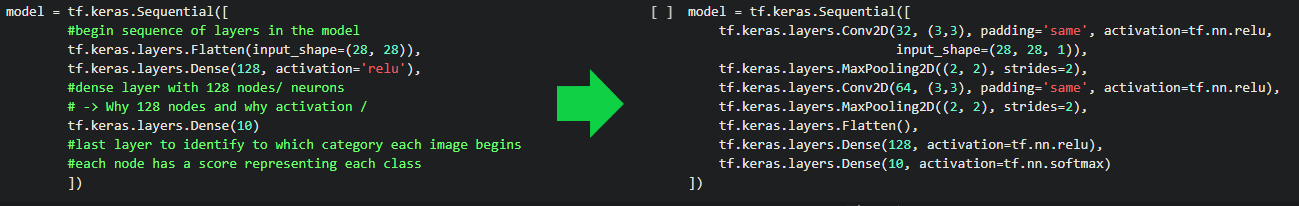
<br><br> 
The 1st tutorial shows the model is overfitting slighly. It would be a good exercise try to mitigate this in this objective as well as become familiar with the TensorBoard.dev 

**Date: 13 of November**

> It was attemepted to have 2 models in the same notebook (initial method with dense layers and the CNN). However, to duplicate all of the code created to evaluate the model (i.e. plot predictions) made everything alot more convoluted and the notebook became difficult to navigate. Therefore, 2 notebooks will be used for objective 1 to keep everything neater, where the only difference is the model.
<br> <br> In addition to the current plots to evaluate the model, a confusion matrix was added at the end of the notebook to better assess the models performance (Note: such was done on both notebooks)

Confusion Matrix Example:
<br>
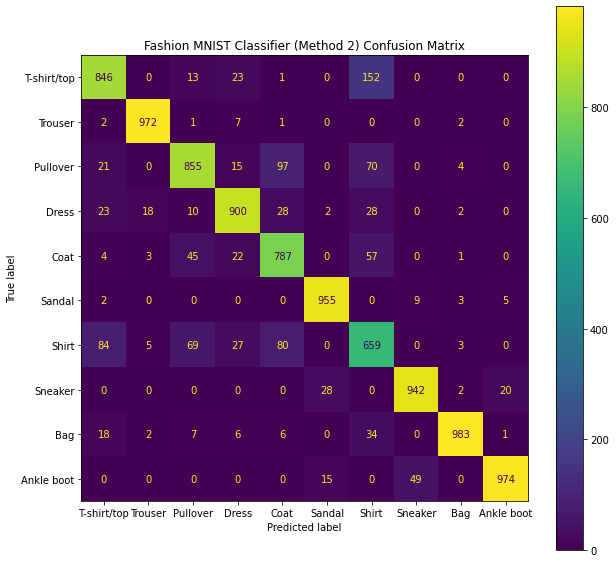



```
#Confusion Matrix Code:
loss, accuracy = model2.evaluate(test_images, test_labels)
probability_model = model2.predict(test_images)
#Convert prediction probabilities into integers
predictions = probability_model.argmax(axis=1)
#Confusion Matrix
cm = confusion_matrix (predictions,test_labels)
#Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);
plt.title("Fashion MNIST Classifier (Method 2) Confusion Matrix")
```



**Date: 15 of November**


> * Both Notebooks were updated to record experiments so these can then be view
on tensorboard. The experiemtns will comprise of hyperparameters changes to fine tune each model. 
* Tensorboard  can plot loss and accuracy vs epoch, histograms and even visualise the model that we are testing
* A series of tests were conducted to assess how hyperparameters affect both models

<br> Some Tensorboard pictures:


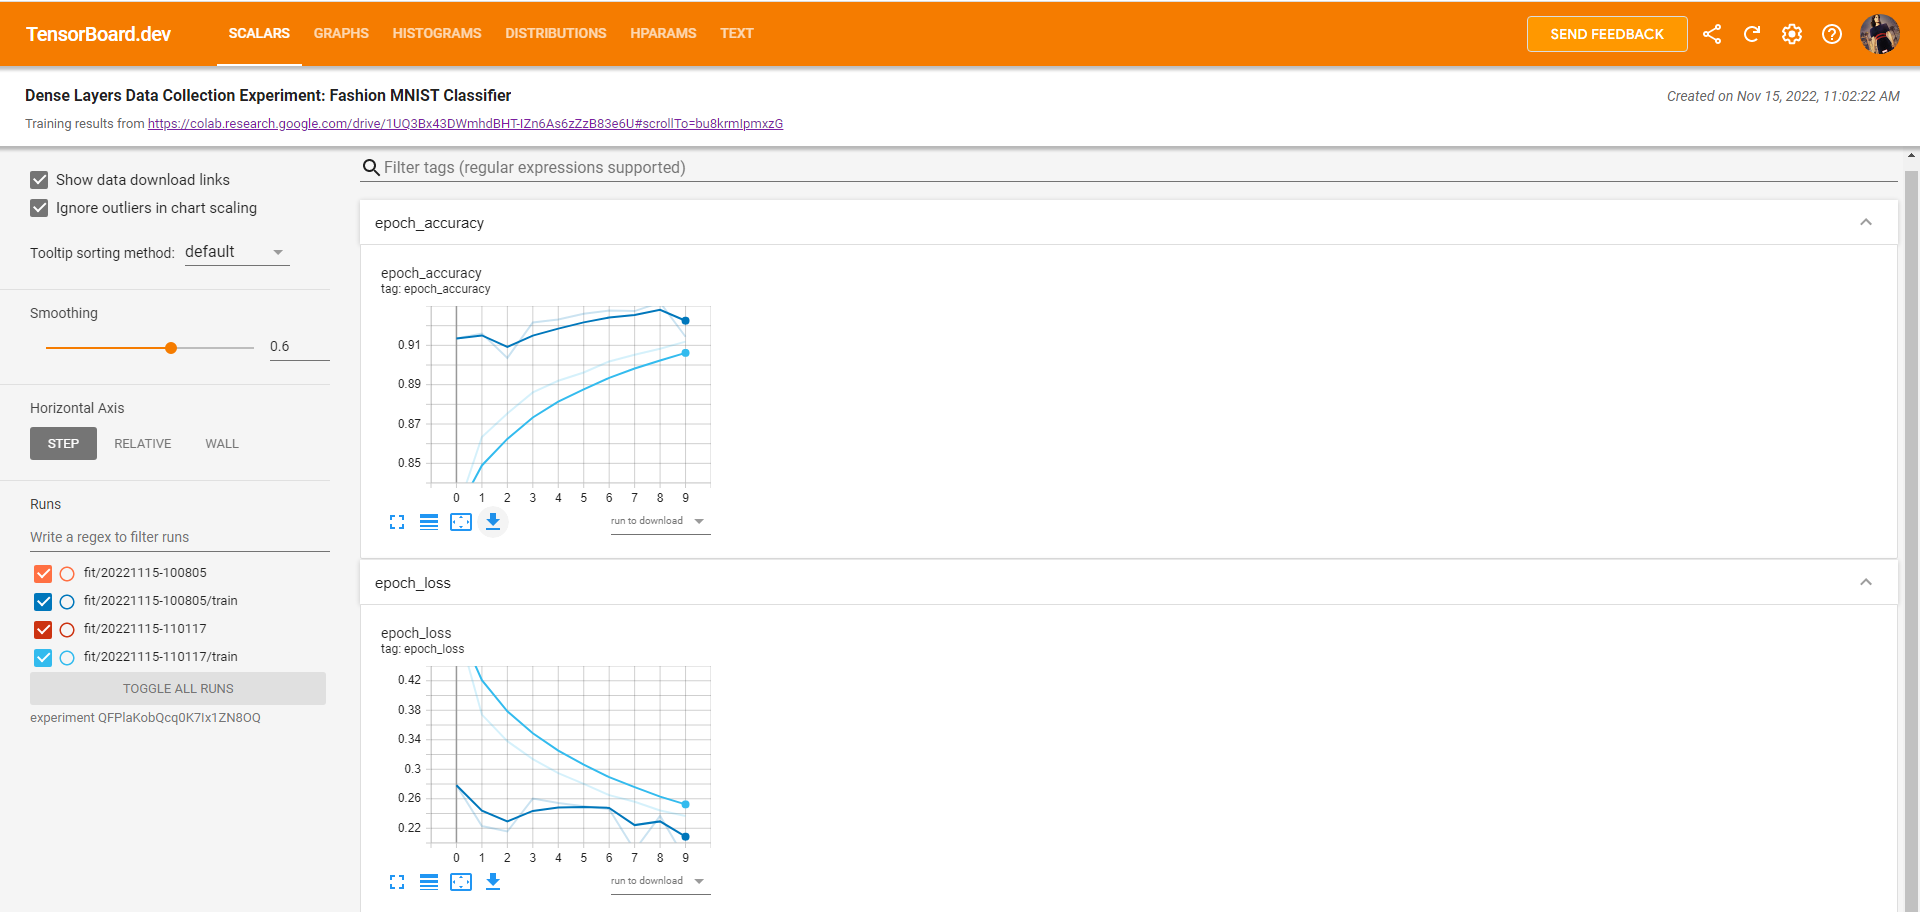


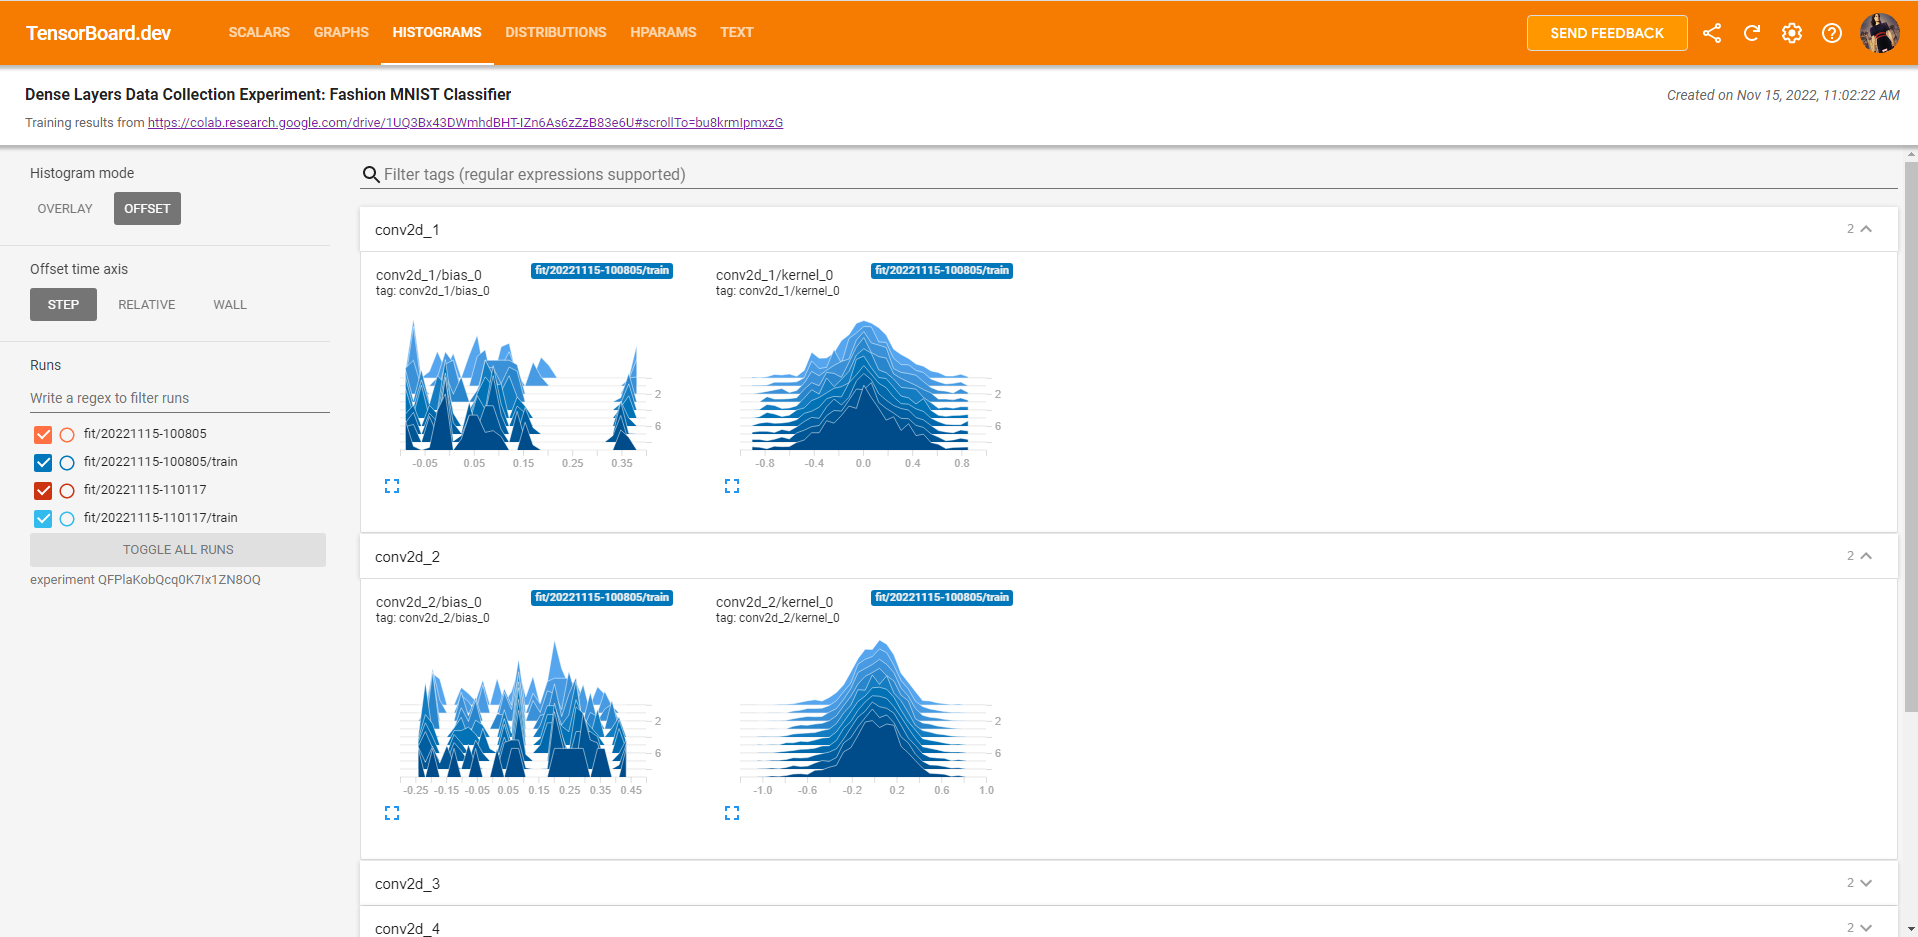

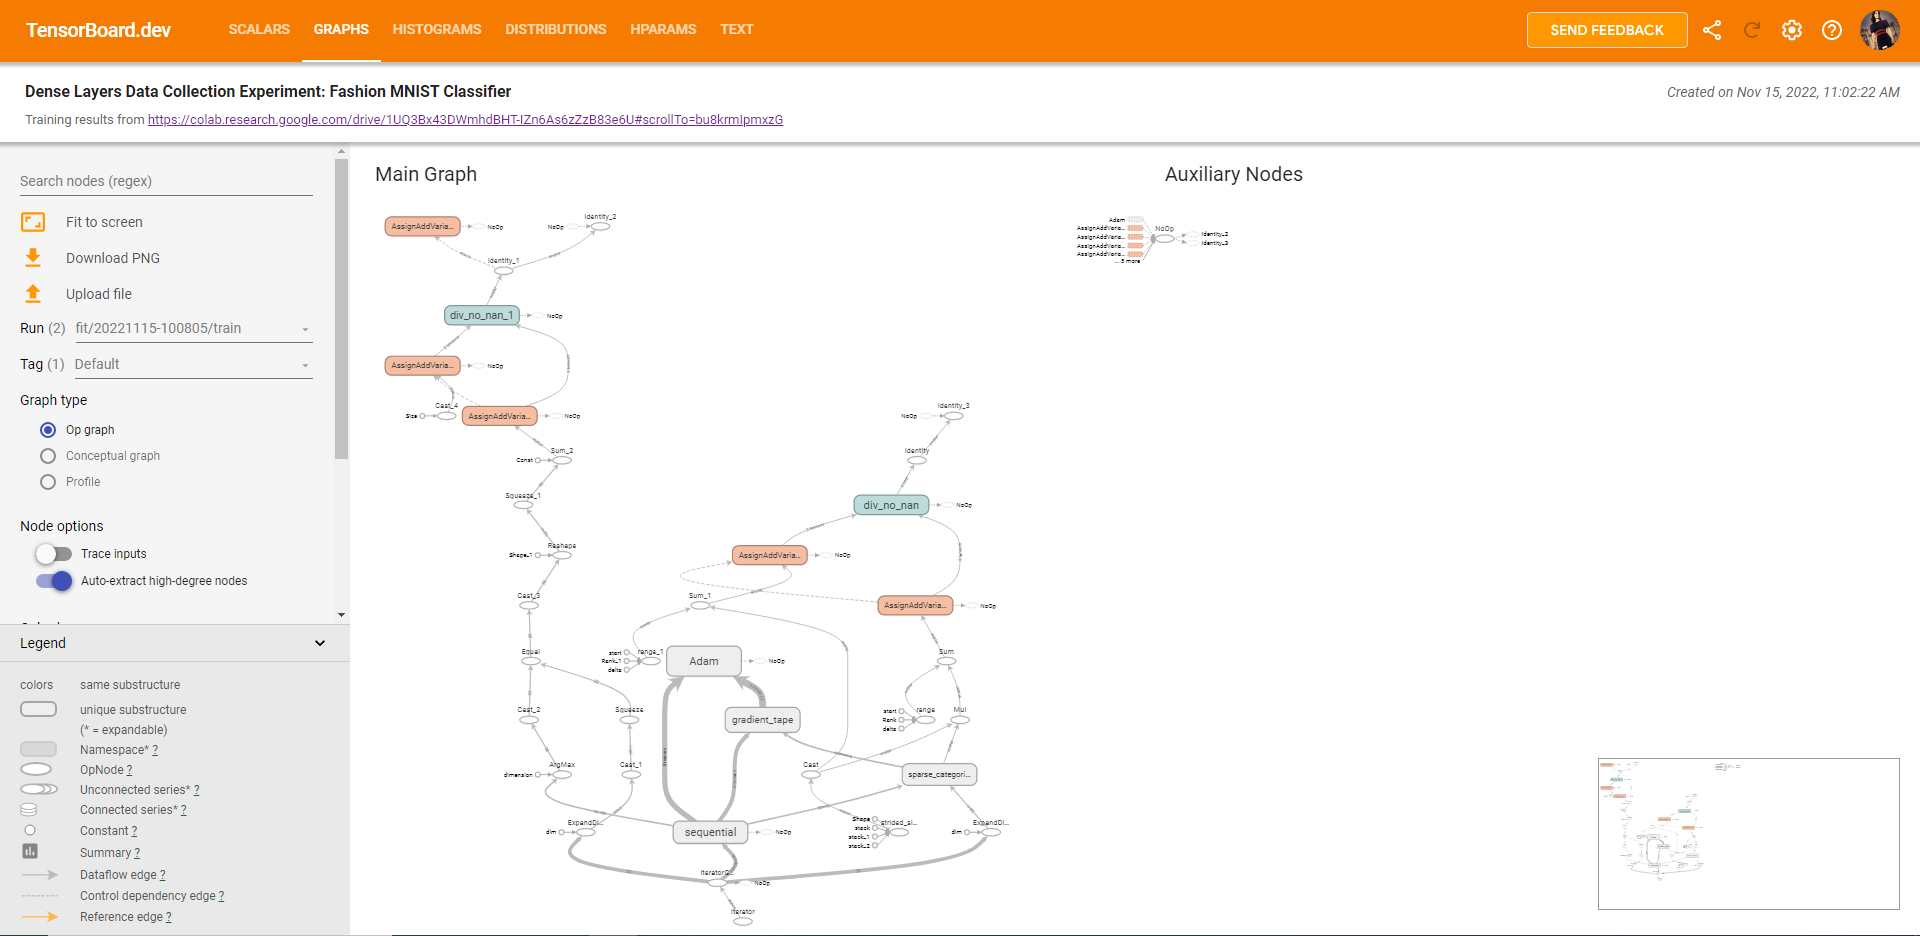


Tensorboard: https://www.tensorflow.org/tensorboard/get_started 
<br>**Working with tensorboard:**
To use tensorboard each notebook needs to be updated to create the necessary log to store the data from each experiment. Below are the step followed.
<br>

<br> 1-Relevant Imports:
```
import datetime, os
from tensorboard.plugins.hparams import api as hp
from tensorboard import notebook
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
```
2-Before fitting the model create the log to store the experiment data:
```
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback2 = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

hparams_callback2 = hp.KerasCallback(log_dir, {'num_relu_units': 512,
                                               'dropout': 0.2
                                    })
```
3-When fitting the model include the calbacks:
```
model2.fit(train_images, train_labels, epochs=10, callbacks=[tensorboard_callback2, hparams_callback2])
```
4-Once fitting is complete upload the experiment data:
```
!tensorboard dev upload --logdir ./logs \
  --name "CNN Data Collection Experiment: Fashion MNIST Classifier" \
  --description "Training results from https://colab.research.google.com/drive/1XklN1Xy7NwK-er02kuskyxEJDgdN6b0H#scrollTo=bu8krmIpmxzG" \
  --one_shot

!tensorboard dev list
```
Note: Make sure to change  the experiment name every time a new experiment is made to keep track of all tests conducted
<br><br>5- Follow the instructions shown on the screen after running the last bit of code as there is a security code to insert so the experiemnt data can be accessed in tensorboard

5.1:
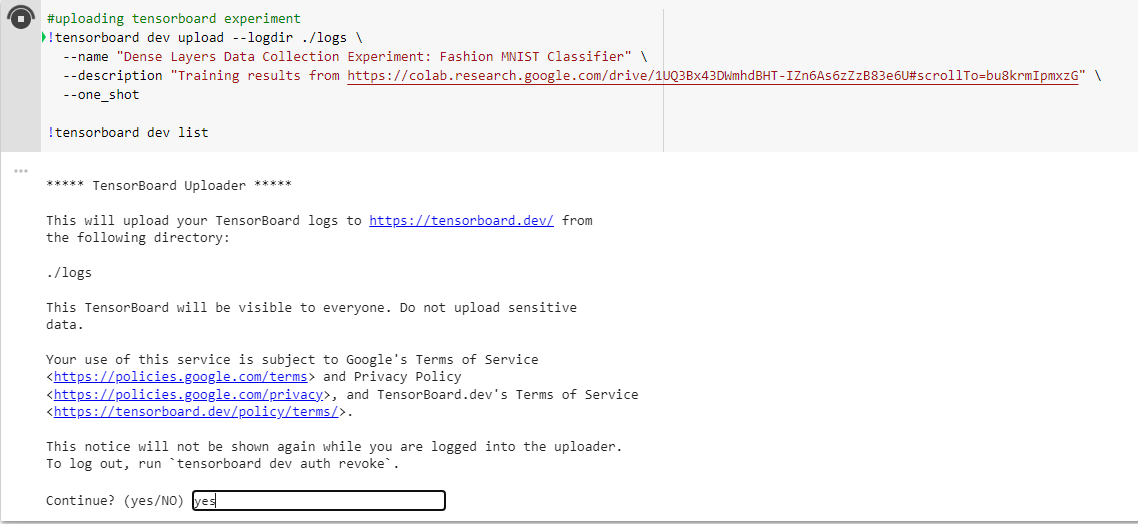

5.2:
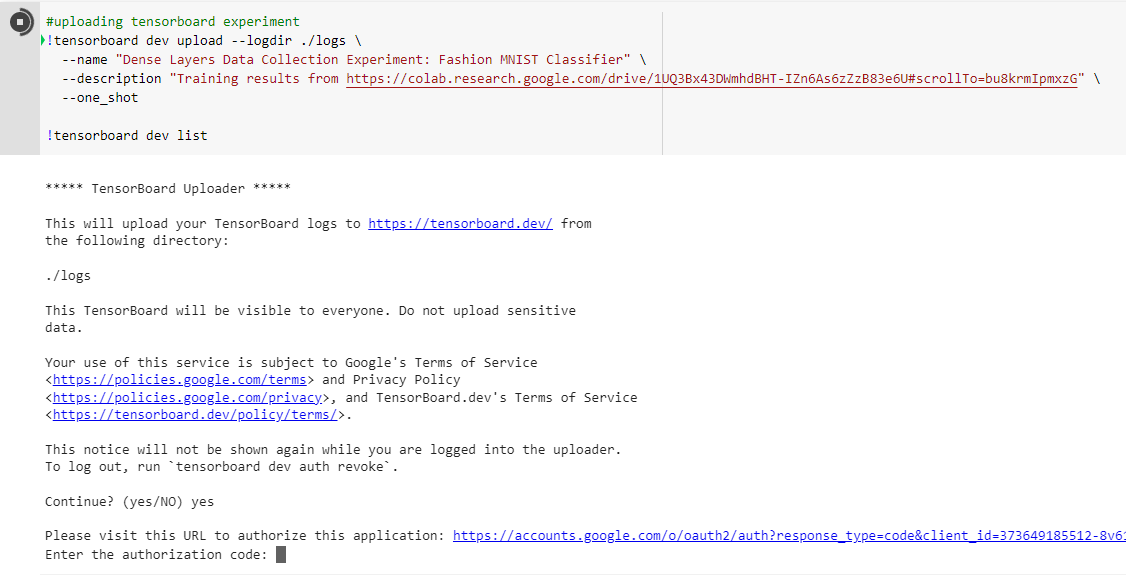

5.3:
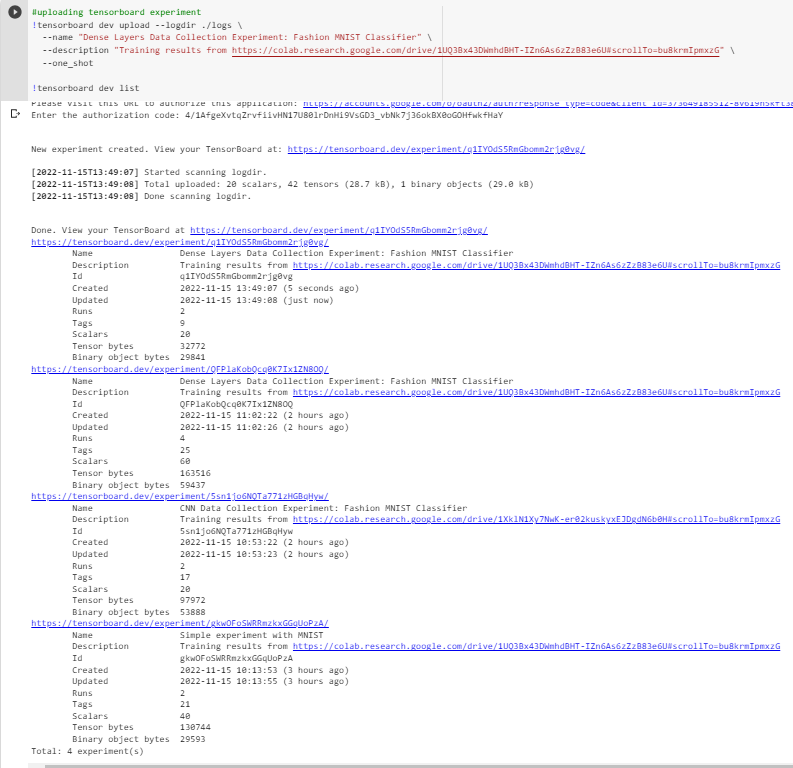

Testing Methodology:
<br>


*   Learning Rate: 0.1, 0.01, 0.001, 0.0001
*   Batch Size: 32, 64, 128
*   Epochs: 10, 50, 100 (500-> stack overflow)
*   Activation Function: Relu, Sigmoid, Softmax and LeakyRelu





Method 1 Learning Rate Test:Epochs= 10, Batch Size= 32, Relu

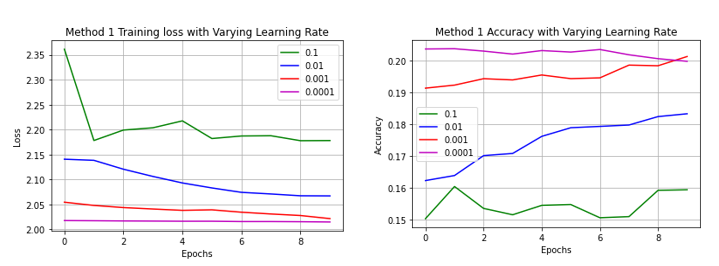

Method 1 Batch Size Test: Epochs=10, Relu, Learning Rate = 0.001

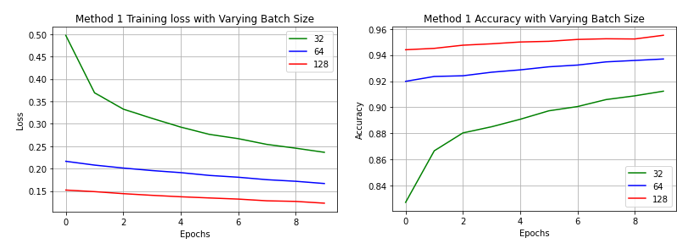

Method 1 Epoch Test: Learning Rate= 0.001, Batch Size= 64, Relu
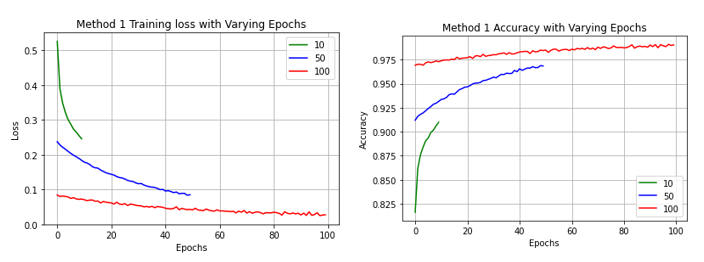

Method 1 Activation Function: Learning Rate= 0.001, Batch Size = 64, Epochs = 10